# Introduction

#### Domain-specific area

The domain-specific area where regression model will contribute to is the value of house. The value of a house have different factors which will affect it's price like it's location, floor area or the age of the building. Using regression model, we can have a prediction of where housing price will be at in the future years. This can be beneficial in the long run as using this data, we can estimate the future value of the property which can help us whether to buy a house now of a certain location and resell it to earn profits.

Singapore is a small country, the land size is only 728.6 km² which means that land are scarce which will drives property up even more. Public houses are government owned meaning that each block of house(hdb) that are built have a lifespan of 99 years. This means if the building is built on year 2000, the building lease will end on 2099 regardless of when the buyer buys it. Private properties are also have a land lease of 99 years or 999 years which means that after the lease is up that plot of land will become the government property again. However, during this lease period, if the government reclaim the land, the government will compensate by market rate. This apply not just on private properties but public houses too.

References:

https://www.hdb.gov.sg/about-us/news-and-publications/publications/hdbspeaks/an-hdb-flat-for-your-different-life-cycle-needs
https://www.ura.gov.sg/corporate/media-room/media-releases/pr15-24


In [2]:
# all the import
from matplotlib import pyplot as plt
import seaborn as sns 

In [3]:
import pandas as pd
import numpy as np

# read the csv file
folder_path = "./resale-flat-prices/"
files_path = [
            folder_path+"resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv",
            folder_path+"resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv",
            folder_path+"resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv",
            folder_path+"resale-flat-prices-based-on-approval-date-2000-feb-2012.csv",
            folder_path+"resale-flat-prices-based-on-approval-date-1990-1999.csv"
            ]

hdb_data = pd.concat(map(pd.read_csv, files_path))

# hdb_data=pd.read_csv('./resale-flat-prices/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')
hdb_data['address'] = hdb_data['block'] + " " + hdb_data['street_name']

In [2]:
import json
import requests

def get_query_string(address):
    return 'https://developers.onemap.sg/commonapi/search?searchVal='+address+'&returnGeom=Y&getAddrDetails=Y' 

def get_geo_location(address):
    response = requests.get(get_query_string(address))
    return json.loads(response.content)




In [19]:
# run this block if there is not an existing json file of geo location for hdb location


addresses = hdb_data['address'].unique().tolist()
print(len(addresses))
hdb_geo_location = {}

# call one time as it takes too long to fetch that much data from api
for address in addresses:
    json_result = get_geo_location(address)
    # if the location of the address is not found, use street_name as the address
    hdb_geo_location[address] = json_result if json_result.get('found') > 0 else get_geo_location(address.split(' ',1)[1])

# store it in json for subsequent use as data of geo location is constant and will not change unless there is new address    
with open('hdbGeoLocation.json', 'w') as json_file:
    json.dump(hdb_geo_location,json_file)


9671


In [21]:
# run this block if there is not an existing json file of geo location for mrt location
mrt_stations = pd.read_csv('./MRTStations.csv', encoding= 'unicode_escape')

# have to unique the station name as there are duplicates
mrt_stations=mrt_stations['Station name'].unique()
mrt_stations_geo_location = {}

for mrt_station in mrt_stations:
    # There are station that contain this special characters
    if(" \x95" in mrt_station):
        print(mrt_station)
        mrt_station = mrt_station.split(" \x95")[0] + " MRT STATION"
        mrt_stations_geo_location[mrt_station]=get_geo_location(mrt_station)
    else:
        mrt_stations_geo_location[mrt_station]=get_geo_location(mrt_station + " MRT STATION")

# store it in json for subsequent use as data of geo location is constant and will not change unless there is new address    
with open('mrtStationGeoLocation.json', 'w') as json_file:
    json.dump(mrt_stations_geo_location,json_file)

Botanic Gardens  Kebun Bunga
Gardens by the Bay  Taman di Pesisiran


In [4]:
from math import cos, asin, sqrt, pi

def distance(lat1, lon1, lat2, lon2):
    p = pi/180
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 12742 * asin(sqrt(a)) #2*R*asin...


In [5]:
import math 

def degToRad(deg):
    return deg*(math.pi/100)

def getDistanceWithLatLon(first_coordinate, second_coordinate):
    earth_radius = 6371 # earth radius in km
    rad_lat = degToRad(second_coordinate['lat']-first_coordinate['lat'])
    rad_lon = degToRad(second_coordinate['long']-first_coordinate['long'])
    
    

In [6]:
# run this block if there is an existing json file of geo location for hdb location
hdb_geo_json = pd.read_json('./hdbGeoLocation.json')
hdb_geo={}

for street_name in hdb_geo_json.keys():
    # if address not found set as None
    if hdb_geo_json.get(street_name).get('found') == 0:
        hdb_geo[street_name]=None
        break
    hdb_geo[street_name] = {'lat':float(hdb_geo_json.get(street_name).get('results')[0].get('LATITUDE')),'long':float(hdb_geo_json.get(street_name).get('results')[0].get('LONGITUDE'))} 
print(hdb_geo)
print(len(hdb_geo_json.keys()))

{'406 ANG MO KIO AVE 10': {'lat': 1.36200453938712, 'long': 103.853879910407}, '108 ANG MO KIO AVE 4': {'lat': 1.37096635222625, 'long': 103.838201940326}, '602 ANG MO KIO AVE 5': {'lat': 1.38070883044887, 'long': 103.835368226602}, '465 ANG MO KIO AVE 10': {'lat': 1.3662010408294, 'long': 103.857200967235}, '601 ANG MO KIO AVE 5': {'lat': 1.38104135523576, 'long': 103.835131742647}, '150 ANG MO KIO AVE 5': {'lat': 1.37680678506745, 'long': 103.842017962576}, '447 ANG MO KIO AVE 10': {'lat': 1.36747901420817, 'long': 103.855967139125}, '218 ANG MO KIO AVE 1': {'lat': 1.36511907555698, 'long': 103.841742483384}, '571 ANG MO KIO AVE 3': {'lat': 1.37005500420092, 'long': 103.854880566919}, '534 ANG MO KIO AVE 10': {'lat': 1.37405846295585, 'long': 103.854168170426}, '233 ANG MO KIO AVE 3': {'lat': 1.36754924977907, 'long': 103.836740628478}, '235 ANG MO KIO AVE 3': {'lat': 1.36682360708102, 'long': 103.83649123895}, '219 ANG MO KIO AVE 1': {'lat': 1.36598198004505, 'long': 103.84065403961

In [7]:
mrt_geo={}

# run this block if there is an existing json file of geo location for hdb location
mrt_stations_geo = pd.read_json('./mrtStationGeoLocation.json')
print(len(mrt_stations_geo.keys()))

for mrt_station in mrt_stations_geo.keys():
    # if address not found set as None
    if mrt_stations_geo.get(mrt_station).get('found') == 0:
        mrt_geo[mrt_station]=None
        break
    mrt_geo[mrt_station] = {'lat':float(mrt_stations_geo.get(mrt_station).get('results')[0].get('LATITUDE')),'long':float(mrt_stations_geo.get(mrt_station).get('results')[0].get('LONGITUDE'))} 

print(mrt_geo)

134
{'Jurong East': {'lat': 1.33315261987295, 'long': 103.742286544006}, 'Bukit Batok': {'lat': 1.3487108105756, 'long': 103.749334517338}, 'Bukit Gombak': {'lat': 1.35861159094192, 'long': 103.751790910733}, 'Choa Chu Kang': {'lat': 1.38536316540225, 'long': 103.744370779756}, 'Yew Tee': {'lat': 1.39747594171731, 'long': 103.747418249132}, 'Kranji': {'lat': 1.42508698073648, 'long': 103.762137459497}, 'Marsiling': {'lat': 1.43252114855026, 'long': 103.774074641403}, 'Woodlands': {'lat': 1.43605761708128, 'long': 103.787938777173}, 'Admiralty': {'lat': 1.44058856161847, 'long': 103.800990519771}, 'Sembawang': {'lat': 1.44905082158502, 'long': 103.820046140211}, 'Canberra': {'lat': 1.44307664075699, 'long': 103.829702590959}, 'Yishun': {'lat': 1.42944308477331, 'long': 103.835005047246}, 'Khatib': {'lat': 1.41738337009565, 'long': 103.832979908243}, 'Yio Chu Kang': {'lat': 1.38175587099132, 'long': 103.84494727118}, 'Ang Mo Kio': {'lat': 1.36942855699191, 'long': 103.849455226442}, 'Bis

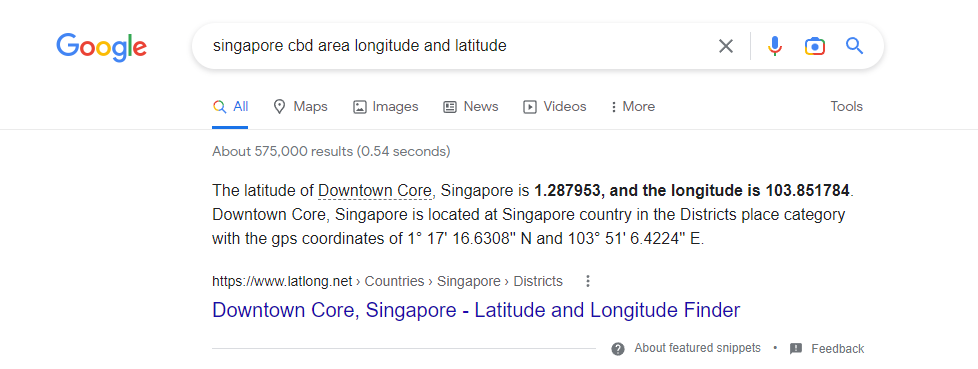


In [8]:
hdb_distance_from_mrt_and_cbd = []
cbd_area_lat_long = {'lat':1.287953, 'long':103.851784}

for street_name in hdb_geo.keys():
    if hdb_geo[street_name] == None:
        print(street_name)
        hdb_distance_from_mrt_and_cbd.append({'address':street_name,'dist_to_mrt':np.nan, 'dist_to_cbd':np.nan})
        break
    distance_list = []
    #distance_dict={}
    for mrt_station in mrt_geo.keys():
        #distance_dict[mrt_station] = distance(hdb_geo[street_name].get('lat'),hdb_geo[street_name].get('long'),mrt_geo[mrt_station].get('lat'),mrt_geo[mrt_station].get('long'))
        distance_list.append(distance(hdb_geo[street_name].get('lat'),hdb_geo[street_name].get('long'),mrt_geo[mrt_station].get('lat'),mrt_geo[mrt_station].get('long')))
    #hdb_distance_from_nearest_mrt[street_name] = min(distance_dict.items(), key=lambda x:x[1])
    #hdb_distance_from_mrt_and_cbd[street_name] = {'dist_to_mrt':min(distance_list),'dist_to_cbd':distance(hdb_geo[street_name].get('lat'),hdb_geo[street_name].get('long'),cbd_area_lat_long.get('lat'),cbd_area_lat_long.get('long'))}
    hdb_distance_from_mrt_and_cbd.append({'address':street_name,'dist_to_mrt':min(distance_list),'dist_to_cbd':distance(hdb_geo[street_name].get('lat'),hdb_geo[street_name].get('long'),cbd_area_lat_long.get('lat'),cbd_area_lat_long.get('long'))})

hdb_distance_df = pd.DataFrame.from_dict(hdb_distance_from_mrt_and_cbd)
print(hdb_distance_df)

1 JLN PASAR BARU
                    address  dist_to_mrt  dist_to_cbd
0     406 ANG MO KIO AVE 10     0.960937     8.237451
1      108 ANG MO KIO AVE 4     0.189875     9.353331
2      602 ANG MO KIO AVE 5     0.535117    10.474170
3     465 ANG MO KIO AVE 10     0.932840     8.721598
4      601 ANG MO KIO AVE 5     0.501150    10.515178
...                     ...          ...          ...
9480     311 CLEMENTI AVE 4     0.471367    10.248448
9481     323 CLEMENTI AVE 5     0.225473     9.912227
9482     321 CLEMENTI AVE 5     0.203660    10.017565
9483        2 GEYLANG SERAI     0.615450     6.111253
9484       1 JLN PASAR BARU          NaN          NaN

[9485 rows x 3 columns]


In [9]:
combined_df = hdb_distance_df.merge(hdb_data, on="address", how='outer')

# Converting to the right data types
combined_df['resale_price'] = combined_df['resale_price'].astype('float')
combined_df['floor_area_sqm'] = combined_df['floor_area_sqm'].astype('float')

combined_df['lease_commence_date'] = combined_df['lease_commence_date'].astype('int64')
combined_df['sales_year']=combined_df['month'].str.split('-').str[0].astype(int)
combined_df['remaining_lease'] = 99- combined_df['sales_year'].subtract(combined_df['lease_commence_date'])
combined_df['price_per_sqm'] = combined_df['resale_price'].div(combined_df['floor_area_sqm'])
combined_df.columns
combined_df.dropna(axis=0,inplace=True)

print(len(combined_df))

877222


In [10]:
combined_df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,dist_to_mrt,dist_to_cbd,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,sales_year,price_per_sqm
count,877222.00000,877222.00000,877222.00000,877222.00000,877222.00000,877222.00000,877222.00000,877222.00000
mean,0.74832,11.79320,96.12094,1988.01660,81.47824,312082.88161,2005.53836,3212.17373
std,0.40603,4.37464,25.78502,10.17759,10.40241,160658.92352,8.79369,1413.98712
min,0.01543,0.72244,28.00000,1966.00000,44.00000,5000.00000,1990.00000,161.29032
25%,0.45081,8.79828,73.00000,1981.00000,75.00000,192000.00000,1998.00000,2279.41176
50%,0.68142,12.47844,93.00000,1986.00000,83.00000,290000.00000,2004.00000,2898.55072
75%,0.96064,15.14452,114.00000,1996.00000,90.00000,405000.00000,2012.00000,4042.73504
max,3.51600,23.25367,307.00000,2019.00000,101.00000,1418000.00000,2022.00000,14731.18280


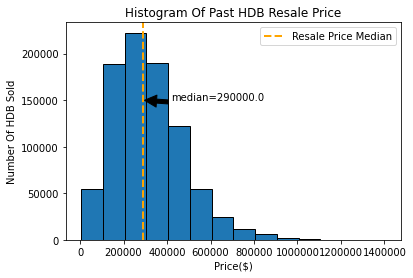

In [11]:
bins = np.arange(combined_df['resale_price'].min(), combined_df['resale_price'].max(),100000)
plt.hist(combined_df['resale_price'],bins=bins,edgecolor="black", range=[combined_df['resale_price'].min(), combined_df['resale_price'].max()])

median_resale_price = combined_df['resale_price'].median()

plt.axvline(median_resale_price, color="orange", linestyle='dashed', label="Resale Price Median", linewidth=2)
plt.annotate('median={median}'.format(median=median_resale_price), xy=(median_resale_price,150000), xytext=(median_resale_price+130000,150000),arrowprops=dict(facecolor='black',shrink=0.05))
plt.legend()

plt.title("Histogram Of Past HDB Resale Price")
plt.xlabel("Price($)")
plt.ylabel("Number Of HDB Sold")
plt.ticklabel_format(style="plain")

plt.show()



<AxesSubplot:>

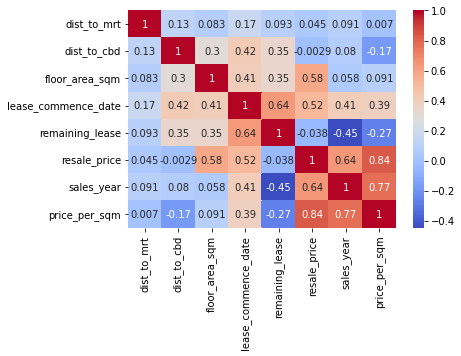

In [12]:
corrMatrix = combined_df.corr()
sns.heatmap(corrMatrix, 
        xticklabels=corrMatrix.columns,
        yticklabels=corrMatrix.columns,
        cmap='coolwarm',
        annot=True)

In [45]:
category_features = ['flat_type', 'storey_range']
#numerical_features = ['resale_price','floor_area_sqm','price_per_sqm','dist_to_mrt','dist_to_cbd','month', flat_type_mapped','mean_storey']
numerical_features = ['floor_area_sqm','price_per_sqm','dist_to_mrt','dist_to_cbd','flat_type_mapped','mean_storey','month']
flat_type_map = {
    'EXECUTIVE': 7,
    'MULTI GENERATION': 6,
    'MULTI-GENERATION': 6,
    '5 ROOM': 5,
    '4 ROOM': 4,
    '3 ROOM': 3,
    '2 ROOM': 2,
    '1 ROOM': 1
}

combined_df['flat_type_mapped'] = combined_df['flat_type'].map(lambda x: flat_type_map[x])
combined_df['mean_storey'] = combined_df['storey_range'].map(lambda storey: float(storey.split(' TO ')[0])+float(storey.split(' TO ')[1]) )

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X=combined_df[numerical_features]
y=combined_df['resale_price'] #resale_price is at the last column of the latest dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.25)
x_axis = X_train['month'].str.split('-').str[0].astype(int).values.reshape(-1,1)
X_train.drop('month',inplace=True, axis=1)
X_test.drop('month',inplace=True, axis=1)
model = LinearRegression().fit(X_train,y_train)

y_train_pred = model.predict(X_train)

model.score(X_train, y_train)

0.9591383303981551

In [54]:
from sklearn.metrics import mean_squared_error,r2_score

#y1_preds = model.fit(X_test,y_test).predict(X_train)
#y2_preds = model.fit(X_train,y_train).predict(X_test)
y_test_pred = model.predict(X_test)
print(r2_score(y_test,y_test_pred))

mean_squared_error(y_train,y_train_pred, squared=False),mean_squared_error(y_test,y_test_pred, squared=False)

0.9590507589455074


(32476.722928020492, 32508.596811179454)

In [55]:
print(x_axis)

[[1998]
 [2018]
 [2002]
 ...
 [1998]
 [2022]
 [1994]]


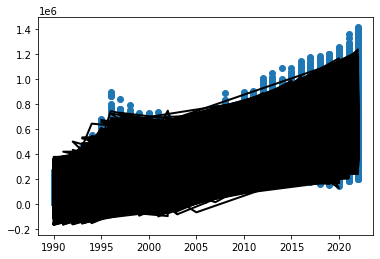

In [59]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

years=combined_df['month'].str.split('-').str[0].astype(int).values.reshape(-1,1)
plt.scatter(years,y)
plt.plot( x_axis,y_train_pred, color='black', linewidth=2, label="Prediction")

In [17]:
print(model.score(X_test,y_test))

0.9590507589455074


In [24]:
from sklearn.metrics import mean_squared_error

y1_preds = model.fit(X_test,y_test).predict(X_train)
y2_preds = model.fit(X_train,y_train).predict(X_test)

mean_squared_error(y_train,y1_preds, squared=False), mean_squared_error(y_test,y2_preds, squared=False)

(32477.06178154531, 32508.596811179454)

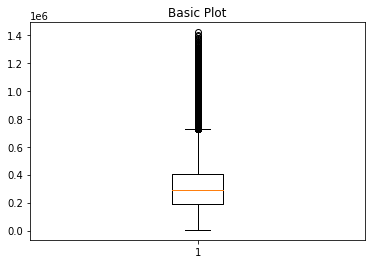

In [127]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(hdb_data['resale_price'])

plt.show()


[52500.0, 57000.0, 64000.0, 103000.0, 152000.0, 188000.0, 248000.0, 290000.0, 240000.0, 236000.0, 239000.0, 225000.0, 215000.0, 217000.0, 223500.0, 225000.0, 228000.0, 250000.0, 305000.0, 330000.0, 365944.0, 410000.0, 445000.0, 455000.0, 420000.0, 405000.0, 410000.0, 410000.0, 408000.0, 400000.0, 425000.0, 483000.0, 525000.0]


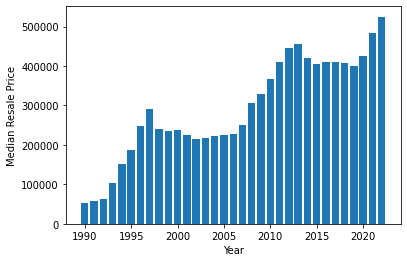

In [3]:
years = np.arange(1990,2023)
hdb_data_by_years = {}

# structure the data to become a dict of year as key and array as value
for year in years:
    hdb_data_by_years[year]=hdb_data.loc[hdb_data['month'].str.contains(str(year), case=False, na=False)]

median_price = [hdb_data_by_years[year]['resale_price'].median() for year in years]
print(median_price)
plt.bar(years,median_price,align='center') # A bar chart
plt.xlabel('Year')
plt.ylabel('Median Resale Price')

plt.show()

